## importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## library for cleaning columns name

In [3]:
pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 838.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 12.1.0
    Uninstalling rich-12.1.0:
      Successfully uninstalled rich-12.1.0
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.3.1 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.
flax 0.6.0 requires rich~=11.1, but you have rich 10.16.2 which is incompatible.
flask 2.2.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.
cached-path 1.1.5 requires rich<13.0,>=12.1, but you have ri

In [4]:
from skimpy import clean_columns

# Importing data

In [5]:
activity= pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories=pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
sleep=pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
intensity= pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
step= pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
intensity_hourly= pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
calories_hourly=pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
step_hourly= pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

# Data Cleaning

## Checking data types

In [6]:
activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

## Cleaning Column names

In [7]:
activity= clean_columns(activity)
calories = clean_columns(calories)
sleep= clean_columns(sleep)
intensity= clean_columns(intensity)
step= clean_columns(step)
calories_hourly = clean_columns(calories_hourly)
intensity_hourly= clean_columns(intensity_hourly)
step_hourly= clean_columns(step_hourly)

In [8]:
activity.dtypes

id                              int64
activity_date                  object
total_steps                     int64
total_distance                float64
tracker_distance              float64
logged_activities_distance    float64
very_active_distance          float64
moderately_active_distance    float64
light_active_distance         float64
sedentary_active_distance     float64
very_active_minutes             int64
fairly_active_minutes           int64
lightly_active_minutes          int64
sedentary_minutes               int64
calories                        int64
dtype: object

# Fixing date format

In [9]:
activity["date"]=pd.to_datetime(activity["activity_date"])
activity.drop(["activity_date"], axis=1, inplace=True)

In [10]:
activity.dtypes

id                                     int64
total_steps                            int64
total_distance                       float64
tracker_distance                     float64
logged_activities_distance           float64
very_active_distance                 float64
moderately_active_distance           float64
light_active_distance                float64
sedentary_active_distance            float64
very_active_minutes                    int64
fairly_active_minutes                  int64
lightly_active_minutes                 int64
sedentary_minutes                      int64
calories                               int64
date                          datetime64[ns]
dtype: object

In [11]:
calories["date"]=pd.to_datetime(calories["activity_day"])
calories.drop(["activity_day"],axis= 1, inplace=True)

In [12]:
sleep["date"]=pd.to_datetime(sleep["sleep_day"])
sleep.drop(["sleep_day"], axis=1, inplace=True)

In [13]:
intensity["date"]=pd.to_datetime(intensity["activity_day"])
intensity.drop(["activity_day"], axis=1, inplace=True)

In [14]:
step["date"]=pd.to_datetime(step["activity_day"])
step.drop(["activity_day"], axis=1, inplace=True)

### splitting to data and time

In [15]:
intensity_hourly["hour"]=pd.to_datetime(intensity_hourly["activity_hour"]).dt.time
step_hourly["hour"]=pd.to_datetime(step_hourly["activity_hour"]).dt.time

# Merging dataset

Before beginning to visualize the data, I need to merge two data sets. I’m going to merge (inner join) activity and sleep on columns Id and date (that I previously created after converting data to date time format).

In [16]:
datasets=[activity,intensity,calories,step,sleep]
merged_all=activity
for data in datasets:
    merged_all=pd.merge(merged_all, data,how="inner")
    

In [17]:
merged_all.shape

(413, 19)

In [18]:
merged_all.head(5)

,id,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date,step_total,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,13162,1,327,346
1,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,10735,2,384,407
2,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,9762,1,412,442
3,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,12669,2,340,367
4,1503960366,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,9705,1,700,712


In [19]:
merged_all.describe()

,id,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,step_total,total_sleep_records,total_minutes_asleep,total_time_in_bed
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,8541.140436,6.038620,6.033632,0.113142,1.450363,0.750242,3.807119,0.000920,25.188862,18.038741,216.854722,712.169492,2397.573850,8541.140436,1.118644,419.467312,458.639225
std,2.060360e+09,4156.926990,3.051998,3.047420,0.513107,1.994352,1.000183,1.734511,0.008653,36.388187,22.403590,87.164687,165.957432,762.886326,4156.926990,0.345521,118.344679,127.101607
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,17.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,5206.000000,3.600000,3.600000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.000000,1850.000000,5206.000000,1.000000,361.000000,403.000000
50%,4.702922e+09,8925.000000,6.290000,6.290000,0.000000,0.570000,0.420000,3.680000,0.000000,9.000000,11.000000,208.000000,717.000000,2220.000000,8925.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,11393.000000,8.030000,8.020000,0.000000,2.370000,1.040000,4.930000,0.000000,38.000000,27.000000,263.000000,783.000000,2926.000000,11393.000000,1.000000,490.000000,526.000000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,22770.000000,3.000000,796.000000,961.000000


**Some interesting discoveries from this summary:**

* Average sedentary time is 991 minutes or 16 hours. **Definately needs to be reduced!**

* The majority of the participants are lightly active.

* On the average, participants sleep 1 time for 7 hours.

Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking **8,000 steps per day** was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps.

In [28]:
merged_all["id"].nunique()

24

## Checking for missing values

In [20]:
merged_all.isnull().sum()

id                            0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
date                          0
step_total                    0
total_sleep_records           0
total_minutes_asleep          0
total_time_in_bed             0
dtype: int64

There is no missing value. So we're heading to data visualization.

### Exporting merged dataset for further use

In [21]:
merged_all.to_csv("merged_all.csv", index=False)

# Data Visualization

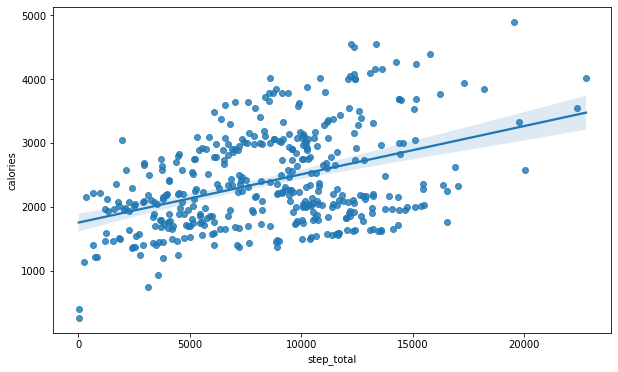

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(data=merged_all, x="step_total",y="calories");

From this regression line we can see that that's a positive slope, which is obvious - the more active we are, the more calories we burn.

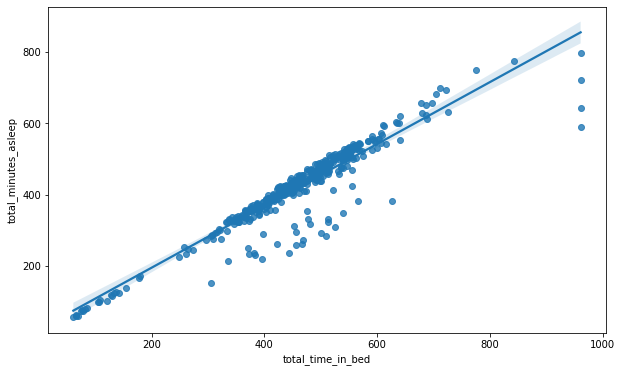

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=merged_all, x="total_time_in_bed",y="total_minutes_asleep");

The relationship between Total Minutes Asleep and Total Time in Bed looks linear. So if the **Bellabeat users want to improve their sleep, we should consider using notification to go to sleep.**

In [24]:
merged_all["week_day"]= merged_all["date"].apply( lambda x: x.day_name())

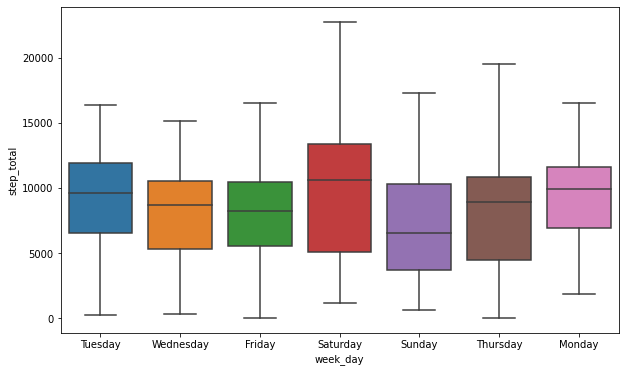

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_all, x="week_day", y= "step_total");

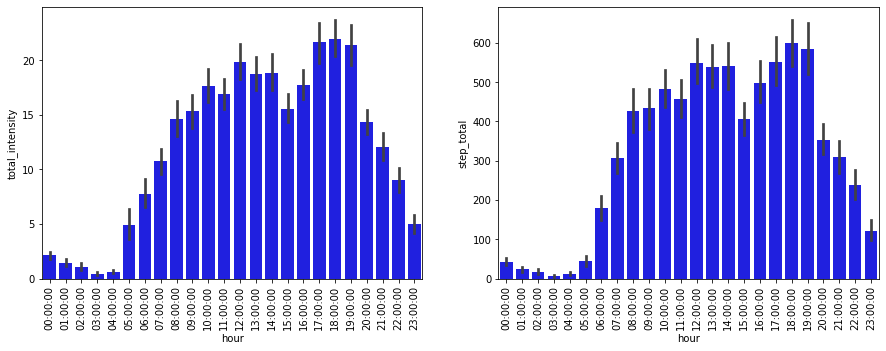

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
sns.barplot(ax=axes[0],data=intensity_hourly, x="hour",y="total_intensity",color="blue")
sns.barplot(ax=axes[1],data=step_hourly, x="hour",y="step_total",color="blue")
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

* After visualizing Total Intensity hourly, I found out that people are more active between 5 am and 10pm.

* Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. **We can use this time in the Bellabeat app to remind and motivate users to go for a run or walk.**

Let's look at the relationship between Total Minutes Asleep and Sedentry Minutes.

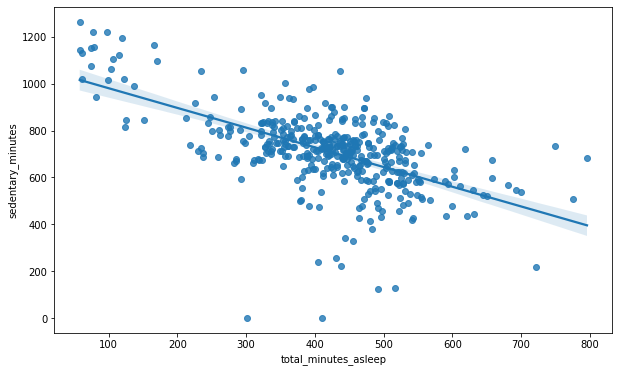

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(data=merged_all, x= "total_minutes_asleep", y= "sedentary_minutes");

* Here we can clearly see the negative relationship between Sedentary Minutes and Sleep time.

* As an idea: if Bellabeat users want **to improve their sleep, Bellabeat app can recommend reducing sedentary time.**

* Keep in mind that we need to support this insights with more data, because correlation between some data doesn’t mean causation.

# Summarizing recommendations for the business
As we already know, collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

After analyzing FitBit Fitness Tracker Data, I found some insights that would help influence Bellabeat marketing strategy.

## Target audience:

Women who work full-time jobs (according to the hourly intensity data) and spend a lot of time at the computer/in a meeting/ focused on work they are doing (according to the sedentary time data).

These women do some light activity to stay healthy (according to the activity type analysis). Even though they need to improve their everyday activity to have health benefits. They might need some knowledge about developing healthy habits or motivation to keep going.

* As there is no gender information about the participants, I assumed that all genders were presented and balanced in this data set.

## The key message for the Bellabeat online campaign

The Bellabeat app is not just another fitness activity app. It’s a guide (a friend) who empowers women to balance full personal and professional life and healthy habits and routines by educating and motivating them through daily app recommendations.

# Ideas for the Bellabeat app

1. Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. Bellabeat can encourage people to take at least 8 000 explaining the benefits for their health.

2. If users want to lose weight, it’s probably a good idea to control daily calorie consumption. Bellabeat can suggest some ideas for low-calorie lunch and dinner.

3. If users want to improve their sleep, Bellabeat should consider using app notifications to go to bed.

4. Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. Bellabeat can use this time to remind and motivate users to go for a run or walk.

5. As an idea: if users want to improve their sleep, the Bellabeat app can recommend reducing sedentary time.

**Thank you** for your interest to my Bellabeat Case Study!